# Static Data Load

In [1]:
import pandas as pd
import numpy as np
import os

def load_data_excel(file_path):
    """
    Load data from an Excel file and return a DataFrame.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    df = pd.read_excel(file_path)
    return df

In [2]:
df_ICE_HEV_original = load_data_excel("G:\\DIY Guru\\Notes and Sample Data\\VED-master\\Data\\VED_Static_Data_ICE&HEV.xlsx")
df_PHEV_EV_original = load_data_excel("G:\\DIY Guru\\Notes and Sample Data\\VED-master\\Data\\VED_Static_Data_PHEV&EV.xlsx")

df_ICE_HEV = df_ICE_HEV_original.copy()
df_PHEV_EV = df_PHEV_EV_original.copy()

In [3]:
df_ICE_HEV.info()
df_PHEV_EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   VehId                                357 non-null    int64 
 1   Vehicle Type                         357 non-null    object
 2   Vehicle Class                        357 non-null    object
 3   Engine Configuration & Displacement  357 non-null    object
 4   Transmission                         354 non-null    object
 5   Drive Wheels                         357 non-null    object
 6   Generalized_Weight                   357 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   VehId                  

In [4]:
for i in df_ICE_HEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_ICE_HEV[i].unique())

Unique values in column 'VehId':
[  2   5   7   8  12 108 110 115 116 119 120 123 124 125 126 128 129 130
 131 132 133 135 137 138 139 140 141 142 143 145 147 148 149 150 153 154
 155 156 157 159 160 161 162 163 164 165 167 169 172 174 176 179 180 181
 184 185 187 189 190 191 192 193 195 196 199 200 201 202 203 205 206 207
 208 209 211 212 213 214 215 216 217 218 220 222 223 225 228 230 231 232
 233 234 235 237 238 240 241 242 243 244 246 247 248 249 250 251 252 254
 255 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273 274 275
 276 278 280 282 283 285 286 288 289 291 292 293 297 298 299 300 301 302
 303 304 306 307 308 309 311 312 313 315 318 319 321 323 324 325 326 328
 329 330 332 333 334 337 338 340 344 345 346 347 348 349 350 351 353 354
 355 356 357 359 360 366 367 368 369 370 372 374 375 376 378 380 381 382
 383 384 385 386 387 389 392 393 394 397 399 400 401 402 403 404 405 406
 407 409 410 411 413 414 415 416 418 422 426 428 429 430 432 433 434 435
 436 437 438 439 4

In [5]:
for i in df_PHEV_EV.columns:
    print(f"Unique values in column '{i}':")
    print(df_PHEV_EV[i].unique())

Unique values in column 'VehId':
[  9  10  11 371 379 388 398 417 431 443 449 453 455 457 492 497 536 537
 541 542 545 550 554 560 561 567 569]
Unique values in column 'EngineType':
['PHEV' 'EV']
Unique values in column 'Vehicle Class':
['Car']
Unique values in column 'Engine Configuration & Displacement':
['4-GAS/ELECTRIC 1.4L' 'ELECTRIC' '4-GAS/ELECTRIC 2.0L'
 '4-GAS/ELECTRIC 1.8L' '4-GAS/ELECTRIC 1.5L']
Unique values in column 'Transmission':
['NO DATA' 'CVT']
Unique values in column 'Drive Wheels':
['FWD']
Unique values in column 'Generalized_Weight':
[4000 3500 3000]


In [6]:
# if 'NO DATA' type values are present, replace them with NaN
df_ICE_HEV.replace('NO DATA', np.nan, inplace=True)
df_PHEV_EV.replace('NO DATA', np.nan, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2096\3721211436.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ICE_HEV.replace('NO DATA', np.nan, inplace=True)


In [7]:
# change datatypes and rename columns as needed
df_ICE_HEV['Drive Wheels'] = df_ICE_HEV['Drive Wheels'].astype('object')
df_PHEV_EV.rename(columns={'EngineType': 'Vehicle Type'}, inplace=True)


In [8]:
df_static = pd.concat([df_ICE_HEV, df_PHEV_EV], ignore_index=True)

In [9]:
df_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   VehId                                384 non-null    int64  
 1   Vehicle Type                         384 non-null    object 
 2   Vehicle Class                        32 non-null     object 
 3   Engine Configuration & Displacement  384 non-null    object 
 4   Transmission                         95 non-null     object 
 5   Drive Wheels                         27 non-null     object 
 6   Generalized_Weight                   368 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 21.1+ KB


In [10]:
for i in df_static.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df_static[i].nunique()}")
    print(df_static[i].unique())
    print(df_static[i].value_counts())


Unique values in column 'VehId':
Number of unique values: 384
[  2   5   7   8  12 108 110 115 116 119 120 123 124 125 126 128 129 130
 131 132 133 135 137 138 139 140 141 142 143 145 147 148 149 150 153 154
 155 156 157 159 160 161 162 163 164 165 167 169 172 174 176 179 180 181
 184 185 187 189 190 191 192 193 195 196 199 200 201 202 203 205 206 207
 208 209 211 212 213 214 215 216 217 218 220 222 223 225 228 230 231 232
 233 234 235 237 238 240 241 242 243 244 246 247 248 249 250 251 252 254
 255 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273 274 275
 276 278 280 282 283 285 286 288 289 291 292 293 297 298 299 300 301 302
 303 304 306 307 308 309 311 312 313 315 318 319 321 323 324 325 326 328
 329 330 332 333 334 337 338 340 344 345 346 347 348 349 350 351 353 354
 355 356 357 359 360 366 367 368 369 370 372 374 375 376 378 380 381 382
 383 384 385 386 387 389 392 393 394 397 399 400 401 402 403 404 405 406
 407 409 410 411 413 414 415 416 418 422 426 428 429 430 432 

In [25]:
df_static.describe(include='all')

,VehId,Vehicle Type,Vehicle Class,Engine Configuration & Displacement,Transmission,Drive Wheels,Generalized_Weight
count,384.000000,384,32,384,95,27,368.000000
unique,NaN,4,2,74,17,1,NaN
top,NaN,ICE,Car,4-FI 2.4L,CVT,FWD,NaN
freq,NaN,264,31,48,27,27,NaN
mean,360.867188,NaN,NaN,NaN,NaN,NaN,3483.695652
std,153.293829,NaN,NaN,NaN,NaN,NaN,697.215509
min,2.000000,NaN,NaN,NaN,NaN,NaN,2000.000000
25%,236.500000,NaN,NaN,NaN,NaN,NaN,3000.000000
50%,369.500000,NaN,NaN,NaN,NaN,NaN,3500.000000
75%,485.250000,NaN,NaN,NaN,NaN,NaN,4000.000000


In [11]:
# check for duplicates
duplicates = df_static.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_static[duplicates])

# Dynamic Data Load

In [12]:
def load_csv_files_from_directory(directory):
    """
    Load all CSV files from a specified directory and return a concatenated DataFrame.
    """
    all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    df_list = []
    
    for file in all_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        df_list.append(df)
    
    return pd.concat(df_list, ignore_index=True)

In [13]:
df_part1_original = load_csv_files_from_directory("G:\\DIY Guru\\Notes and Sample Data\\VED-master\\Data\\VED_DynamicData_Part1")
#df_part2_original = load_csv_files_from_directory("G:\\DIY Guru\\Notes and Sample Data\\VED-master\\Data\\VED_DynamicData_Part2")

df_part1 = df_part1_original.copy()
#df_part2 = df_part2_original.copy()


In [14]:
df_part1.info()
#df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236957 entries, 0 to 10236956
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   DayNum                          float64
 1   VehId                           int64  
 2   Trip                            int64  
 3   Timestamp(ms)                   int64  
 4   Latitude[deg]                   float64
 5   Longitude[deg]                  float64
 6   Vehicle Speed[km/h]             float64
 7   MAF[g/sec]                      float64
 8   Engine RPM[RPM]                 float64
 9   Absolute Load[%]                float64
 10  OAT[DegC]                       float64
 11  Fuel Rate[L/hr]                 float64
 12  Air Conditioning Power[kW]      float64
 13  Air Conditioning Power[Watts]   float64
 14  Heater Power[Watts]             float64
 15  HV Battery Current[A]           float64
 16  HV Battery SOC[%]               float64
 17  HV Battery Voltage[V]    

In [15]:
for i in df_part1.columns:
    print(f"Unique values in column '{i}':")
    print(df_part1[i].unique())

Unique values in column 'DayNum':
[  1.58665119   1.93178629   1.71977381 ... 154.07965256 154.6622428
 154.03639969]
Unique values in column 'VehId':
[  8  10  11 124 125 130 133 147 154 155 156 160 165 174 176 184 189 195
 203 207 209 212 216 220 223 228 230 231 233 237 240 241 242 259 260 265
 267 272 278 298 299 301 304 319 323 334 340 344 350 351 353 355 356 370
 374 378 387 388 394 410 411 418 430 433 434 438 439 440 445 449 450 451
 452 456 460 462 468 477 478 488 497 502 507 516 519 521 528 532 535 537
 540 547 549 550 557 569 574 575 576 579 584 588 108 110 116 128 140 150
 157 180 181 185 192 215 225 244 246 248 249 250 257 258 276 291 307 315
 330 367 369 384 392 393 398 403 415 422 431 432 443 444 453 464 465 480
 486 494 500 530 531 533 543 546 555 560 564 587 595 601 163 196 205 213
 217 222 234 266 273 283 289 308 309 324 326 345 346 372 375 382 399 400
 402 426 441 482 483 538 554 565 592 596 597 606 608 126 132 218 232 243
 264 268 282 292 337 347 359 368 385 405 428 4

In [ ]:
for i in df_part2.columns:
    print(f"Unique values in column '{i}':")
    print(df_part2[i].unique())

In [ ]:
df_dynamic = pd.concat([df_part1, df_part2], ignore_index=True)

In [16]:
df_dynamic.info()

NameError: name 'df_dynamic' is not defined

In [ ]:
for i in df_dynamic.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df_dynamic[i].nunique()}")
    print(df_dynamic[i].unique())
    print(df_dynamic[i].value_counts())

In [ ]:
df_dynamic.describe(include='all')

In [ ]:
df_dynamic.head()

In [29]:
# check for duplicates
duplicates = df_dynamic.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_dynamic[duplicates])
    

NameError: name 'df_dynamic' is not defined

In [ ]:
df_static.columns

In [ ]:
df_dynamic.columns

# Join Static and Dynamic dataframes

In [ ]:
print(df_dynamic['VehId'].nunique(), len(df_dynamic))
print(df_static['VehId'].nunique(), len(df_static))

In [17]:
df_dynamic_sample = df_part1.sample(frac=0.50, random_state=42)

In [18]:
len(df_dynamic_sample)

5118478

In [19]:
df = df_dynamic_sample.merge(df_static, on='VehId', how='left')

In [ ]:
#22436808
df.info()

In [20]:
# check for duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df[duplicates])

In [81]:
for i in df.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df[i].nunique()}")
    print(df[i].unique())
    print(df[i].value_counts())


Unique values in column 'DayNum':
Number of unique values: 15383
[130.55213663 109.90206494  46.50061109 ...  30.59042635   7.60616594
  76.84865423]
DayNum
47.605510     5395
42.708322     4880
100.445583    3220
1.477313      3179
23.953190     2932
              ... 
35.892528       42
141.737495      42
37.589300       41
36.048668       40
114.777630      39
Name: count, Length: 15383, dtype: int64

Unique values in column 'VehId':
Number of unique values: 368
[487 392 285 566 242 560 494 240 369 542 565 428 156 212 455 394 452 443
 308 465 176 418 237 371 278 577  10 545 301 271 192 289 460 531 562 557
 181 230 370 208 184 323 272 356 298 459 536 160 283 477 484 534 139 533
 120 232 569 411 470 195   2 250 180   8 258 540 591 454 319 488 409 415
 309 564 457 349 374 516 595 135 282 233 185 378 368 223 437 274 140 213
 483 618 269 228 561 353 372 388 333 163 203 522 299 205 592 430 439 490
 435 276 530 196 286 447 155 476 266 147 475 347 410 444 215 575 218 351
 546 468 307 450 6

In [ ]:
df.head().to_dict()

In [35]:
df['OAT[DegC]'].sort_values().unique()

array([-40.  , -39.  , -38.  , -37.  , -36.  , -24.5 , -21.5 , -21.25,
       -21.  , -20.75, -20.5 , -20.25, -20.  , -19.75, -19.5 , -19.  ,
       -18.5 , -18.25, -18.  , -17.75, -17.5 , -17.25, -17.  , -16.75,
       -16.5 , -16.25, -16.  , -15.75, -15.5 , -15.25, -15.  , -14.75,
       -14.5 , -14.25, -14.  , -13.75, -13.5 , -13.25, -13.  , -12.75,
       -12.5 , -12.25, -12.  , -11.75, -11.5 , -11.25, -11.  , -10.75,
       -10.5 , -10.25, -10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,
        -8.5 ,  -8.25,  -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,
        -6.5 ,  -6.25,  -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,
        -4.5 ,  -4.25,  -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,
        -2.5 ,  -2.25,  -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,
        -0.5 ,  -0.25,   0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,
         1.5 ,   1.75,   2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,
         3.5 ,   3.75,   4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,
      

In [21]:
# < -20, -20 to 0, 0 to 10, 10 to 20, 20 to 30, > 30, map these values to OAT[DegC] values and create a new column 'OAT_Category'

def categorize_oat(value):
    if value < -20:
        return 'Extremely Cold'
    elif -20 <= value < 0:
        return 'Cold'
    elif 0 <= value < 10:
        return 'Cool'
    elif 10 <= value < 20:
        return 'Mild'
    elif 20 <= value < 30:
        return 'Warm'
    elif value >= 30:
        return 'Hot'
    else:
        return np.nan

df['OAT_Category'] = df['OAT[DegC]'].apply(categorize_oat)


In [22]:
df['OAT_Category'].unique()

array([nan, 'Cool', 'Cold', 'Mild', 'Warm', 'Extremely Cold', 'Hot'],
      dtype=object)

In [ ]:
df.info()

In [ ]:
df = df.sort_values(by=['DayNum', 'VehId','Trip']).reset_index(drop=True)
df.head()

In [23]:
import pandas as pd
from datetime import datetime, timedelta

# Reference datetime for DayNum = 1
reference_date = datetime(2017, 11, 1)

# Convert DayNum to timestamp using vectorized timedelta
df['DateTime'] = pd.to_timedelta(df['DayNum'] - 1, unit='D') + reference_date

# Create separate columns for date and time
df['Date'] = df['DateTime'].dt.date

# Create a time column with proper formatting
df['Time'] = df['DateTime'].dt.time

In [24]:
# calculate distance travelled in km using Vehicle Speed[km/h] and Timestamp(ms)
df['Distance[km]'] = df['Vehicle Speed[km/h]'] * (df['Timestamp(ms)'] / 3600000)

In [ ]:
import pandas as pd
import numpy as np

# Constants
AFR = 14.7  # typical AFR for gasoline engines
ρ_air = 1.184  # air density in kg/m³

def compute_fcr(df):
    # Parse displacement in liters from 'Engine Configuration & Displacement' if format like "I4 2.0L"
    def extract_displacement(val):
        try:
            return float(val.split()[-1].replace("L", ""))
        except:
            return np.nan

    df['Displacement_L'] = df['Engine Configuration & Displacement'].apply(extract_displacement)

    # Compute correction factor
    df['correction'] = (1 + df['Short Term Fuel Trim Bank 1[%]']/100 + df['Long Term Fuel Trim Bank 1[%]']/100) / AFR

    # Step 1: Use FuelRate if available
    df['FCR'] = np.where(
        ~df['Fuel Rate[L/hr]'].isna(),
        df['Fuel Rate[L/hr]'],
        np.nan
    )

    # Step 2: Else if MAF is available
    maf_condition = df['FCR'].isna() & ~df['MAF[g/sec]'].isna()
    df.loc[maf_condition, 'FCR'] = df.loc[maf_condition, 'MAF[g/sec]'] * df.loc[maf_condition, 'correction']

    # Step 3: Else if AbsLoad and RPMeng are available
    derived_condition = df['FCR'].isna() & ~df['Absolute Load[%]'].isna() & ~df['Engine RPM[RPM]'].isna() & ~df['Displacement_L'].isna()
    maf_derived = (df['Absolute Load[%]'] / 100) * ρ_air * df['Displacement_L'] * df['Engine RPM[RPM]'] / 120
    df.loc[derived_condition, 'FCR'] = maf_derived[derived_condition] * df.loc[derived_condition, 'correction']

    return df

df = compute_fcr(df)


In [109]:
df.columns
# Save the final DataFrame to a CSV file

Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]', 'Vehicle Type', 'Vehicle Class',
       'Engine Configuration & Displacement', 'Transmission', 'Drive Wheels',
       'Generalized_Weight', 'OAT_Category', 'DateTime', 'Date', 'Time',
       'Distance[km]', 'HV Battery Power[kW]', 'HV Battery Power[Watts]',
       'Displacement_L', 'correction', 'FCR'],
      dtype='object')

# Sample plots

In [404]:
df_distance = df.groupby(['Vehicle Type'])['Distance[km]'].mean().reset_index().sort_values(by='Distance[km]', ascending=False)
df_distance

,Vehicle Type,Distance[km]
3,PHEV,5.789103
1,HEV,4.873559
0,EV,4.478784
2,ICE,4.421037


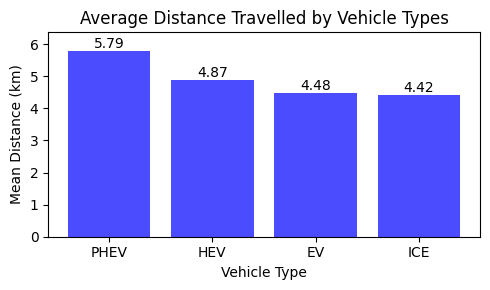

In [405]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.bar(df_distance['Vehicle Type'], df_distance['Distance[km]'], alpha=0.7, color= 'blue')
plt.title('Average Distance Travelled by Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Mean Distance (km)')
plt.ylim(0, df_distance['Distance[km]'].max() * 1.1)  # Set y-axis limit to 10% above max distance
# Add text labels on top of the bars
for index, value in enumerate(df_distance['Distance[km]']):
    plt.text(index, value , f"{value:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by day and calculate mean HV Battery Voltage
df_eot = df.groupby(df['Date'].dt.to_period('D'))['HV Battery Voltage[V]'].mean().reset_index()
df_eot['Date'] = df_eot['Date'].dt.to_timestamp()
df_eot = df_eot.sort_values(by='Date')
df_eot

,Date,HV Battery Voltage[V]
0,2017-11-01,340.125991
1,2017-11-02,253.911069
2,2017-11-03,259.114447
3,2017-11-04,276.070132
4,2017-11-05,321.144065
...,...,...
149,2018-03-30,261.779422
150,2018-03-31,268.318241
151,2018-04-01,286.188751
152,2018-04-02,233.540929


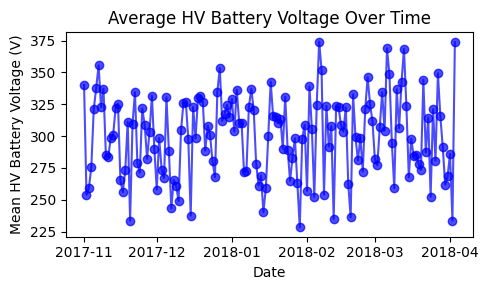

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_eot['Date'], df_eot['HV Battery Voltage[V]'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average HV Battery Voltage Over Time')
plt.xlabel('Date')
plt.ylabel('Mean HV Battery Voltage (V)')
plt.tight_layout()
plt.show()

In [112]:
# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by day and calculate mean Fuel Rate
df_eof = df.groupby(df['Date'].dt.to_period('D'))['FCR'].mean().reset_index()
df_eof['Date'] = df_eof['Date'].dt.to_timestamp()
df_eof = df_eof.sort_values(by='Date')
df_eof

,Date,FCR
0,2017-11-01,0.000000
1,2017-11-02,0.687202
2,2017-11-03,0.902463
3,2017-11-04,0.819851
4,2017-11-05,0.744445
...,...,...
149,2018-03-30,1.064590
150,2018-03-31,0.715263
151,2018-04-01,0.757474
152,2018-04-02,0.755047


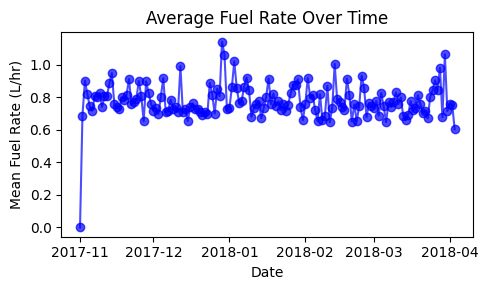

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_eof['Date'], df_eof['FCR'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average Fuel Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Fuel Rate (L/hr)')
plt.tight_layout()
plt.show()

In [45]:
df_map = df.groupby(['Latitude[deg]', 'Longitude[deg]'])['Trip'].mean().reset_index()
df_map

,Latitude[deg],Longitude[deg],Trip
0,42.220305,-83.760323,1661.0
1,42.220306,-83.767207,1502.0
2,42.220309,-83.778162,1659.0
3,42.220316,-83.734527,1955.0
4,42.220316,-83.760919,1399.0
...,...,...,...
1856096,42.325775,-83.749506,1983.0
1856097,42.325780,-83.756816,1983.0
1856098,42.325787,-83.707453,1183.0
1856099,42.325796,-83.749125,1089.0


In [49]:
df_map.head()

,Latitude[deg],Longitude[deg],Trip
0,42.220305,-83.760323,1661.0
1,42.220306,-83.767207,1502.0
2,42.220309,-83.778162,1659.0
3,42.220316,-83.734527,1955.0
4,42.220316,-83.760919,1399.0


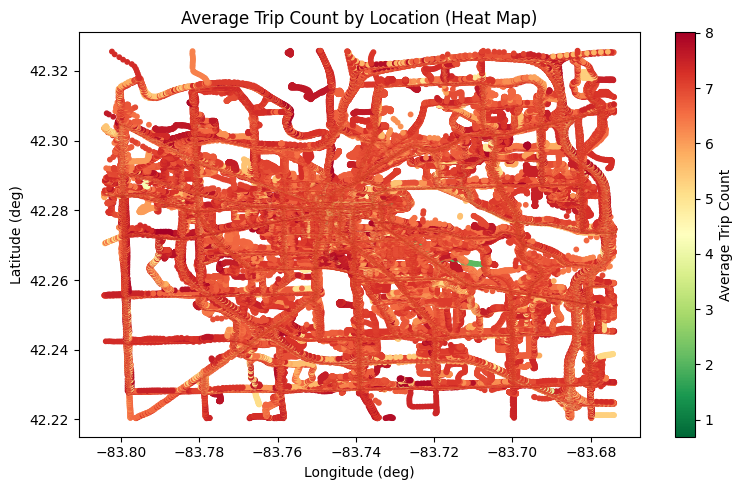

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sc = plt.scatter(
    df_map['Longitude[deg]'],
    df_map['Latitude[deg]'],
    c=np.log(df_map['Trip']),
    marker='o',
    s=10,
    cmap='RdYlGn_r'
)
plt.colorbar(sc, label='Average Trip Count')
plt.title('Average Trip Count by Location (Heat Map)')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.tight_layout()
plt.show()


In [52]:
# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and calculate average trips per month
df_trip = df.groupby(df['Date'].dt.to_period('M'))['Trip'].mean().reset_index()
df_trip['Date'] = df_trip['Date'].dt.to_timestamp()
df_trip = df_trip.sort_values(by='Date')
df_trip

,Date,Trip
0,2017-11-01,812.870813
1,2017-12-01,917.432321
2,2018-01-01,1027.306361
3,2018-02-01,1175.387338
4,2018-03-01,1258.388631
5,2018-04-01,1317.635415


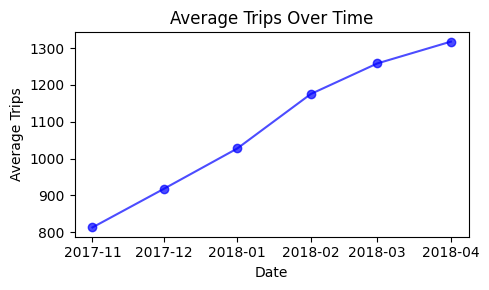

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_trip['Date'], df_trip['Trip'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Average Trips')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

In [79]:
df['HV Battery Power[Watts]'] = df['HV Battery Voltage[V]'] * df['HV Battery Current[A]']

In [125]:
df_SOC = df.groupby(['OAT_Category', 'Vehicle Type'])[
    ['HV Battery Power[Watts]', 'Air Conditioning Power[Watts]', 'Heater Power[Watts]','HV Battery SOC[%]','FCR']
].mean().reset_index().sort_values(by='HV Battery SOC[%]', ascending=False)

df_SOC

,OAT_Category,Vehicle Type,HV Battery Power[Watts],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery SOC[%],FCR
4,Cool,EV,-6315.025345,407.628054,401.791590,78.880645,NaN
12,Mild,EV,-4864.866869,64.395251,141.293594,78.480394,NaN
0,Cold,EV,-7207.394049,524.328587,1493.045840,72.497332,NaN
18,Warm,PHEV,-4609.834834,818.198198,NaN,56.076689,NaN
11,Hot,PHEV,-3295.594514,747.712418,NaN,42.988390,NaN
3,Cold,PHEV,-3308.952767,4.091151,NaN,28.827266,1.588181
9,Extremely Cold,PHEV,-1156.463762,0.000000,NaN,27.144109,5.838999
15,Mild,PHEV,-3634.517430,218.946951,NaN,26.340167,0.676201
7,Cool,PHEV,-3375.550045,24.847430,NaN,25.019190,1.106321
1,Cold,HEV,NaN,NaN,NaN,NaN,0.549312


In [438]:
df_EC_trip = df.groupby(['Trip','Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'
       ]
].mean().reset_index().sort_values(by=['FCR','HV Battery Power[Watts]'], ascending=False)

df_EC_trip

,Trip,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
737,422,PHEV,42.287141,-83.725580,NaN,NaN,60.795111,0.576187,2334.161290,1.500000,4000.000000,8.519646,5723.351390,NaN,NaN,NaN,NaN,NaN,NaN
503,315,PHEV,42.267723,-83.719078,0.000000,NaN,42.921597,2.772324,504.244681,8.915780,4000.000000,8.167473,-4192.833443,0.710000,NaN,NaN,NaN,NaN,NaN
1049,544,PHEV,42.295950,-83.702473,NaN,NaN,59.629204,1.348090,2188.994924,-3.010152,4000.000000,8.029910,3143.135527,NaN,NaN,NaN,NaN,NaN,NaN
3723,1565,PHEV,42.294440,-83.792688,NaN,NaN,65.545201,8.649201,2108.468750,-18.709821,4000.000000,7.875599,7965.864873,NaN,NaN,NaN,NaN,NaN,NaN
620,368,PHEV,42.281735,-83.718567,0.125392,NaN,38.494302,9.066935,786.875829,-6.256781,3038.577456,7.782446,276.822704,6.275787,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2670,ICE,42.230204,-83.698985,NaN,NaN,68.260870,1.517008,1953.159420,NaN,3500.000000,NaN,NaN,NaN,NaN,3.430707,NaN,3.509964,NaN
5034,2883,ICE,42.276690,-83.681240,NaN,NaN,51.305556,0.746649,1213.638889,7.046296,3500.000000,NaN,NaN,14.180926,27.567175,-1.121238,-9.194155,NaN,NaN
5035,2889,ICE,42.242079,-83.680689,NaN,NaN,40.365625,1.750702,1223.231250,5.400000,3500.000000,NaN,NaN,15.231781,30.715687,-1.086426,-9.291992,NaN,NaN
5036,2898,ICE,42.272055,-83.685443,NaN,NaN,43.899899,5.995511,1215.314459,3.338726,3500.000000,NaN,NaN,15.655702,32.528401,-0.201435,-9.765230,NaN,NaN


In [440]:
df_EC_time = df.groupby([df['Date'].dt.to_period('M'), 'Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
].mean().reset_index().sort_values(
    by=['Date', 'FCR', 'HV Battery Power[Watts]'],
)

df_EC_time

,Date,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
1,2017-11,HEV,42.270885,-83.730286,NaN,NaN,43.413799,4.422087,1053.625865,NaN,3213.726498,0.542582,NaN,7.956748,26.756422,-0.672727,0.048961,0.118748,-0.704893
2,2017-11,ICE,42.271662,-83.728795,NaN,NaN,37.604944,4.351819,1384.739340,NaN,3553.919165,0.876889,NaN,12.390124,30.489777,0.372626,-0.100306,1.424386,1.556238
3,2017-11,PHEV,42.276155,-83.724590,107.837861,NaN,40.055765,6.130402,446.089312,5.302876,3606.249474,1.122664,-3639.575620,4.288507,NaN,NaN,NaN,NaN,NaN
0,2017-11,EV,42.270438,-83.729372,385.080724,387.570512,37.845037,5.197760,NaN,4.947384,3500.000000,NaN,-5819.770797,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-12,HEV,42.270560,-83.727416,NaN,NaN,41.474029,5.158407,1091.908296,NaN,3230.512406,0.539653,NaN,7.960814,26.734022,-0.812959,-0.377534,-0.383901,-1.230228
6,2017-12,ICE,42.270985,-83.727754,NaN,NaN,36.485543,4.932551,1370.856595,NaN,3541.763087,0.818075,NaN,11.525376,30.296919,0.432193,-0.373544,1.733919,1.184792
7,2017-12,PHEV,42.272422,-83.724337,8.106811,NaN,38.090622,6.039241,550.119223,-1.480307,3637.054524,1.276928,-3245.157058,5.206778,28.515582,0.624510,NaN,-2.265380,NaN
4,2017-12,EV,42.275912,-83.729516,527.820062,725.497236,38.324684,4.999694,NaN,-0.503159,3500.000000,NaN,-6548.884092,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-01,HEV,42.272277,-83.731813,NaN,NaN,41.960510,4.753501,1160.532423,1.865404,3203.124223,0.564790,NaN,8.364218,29.259980,-0.683583,-0.122051,-0.709057,-1.111838
10,2018-01,ICE,42.270453,-83.730027,NaN,NaN,37.654817,4.324497,1406.320488,2.255533,3480.709759,0.843201,NaN,11.967993,31.730827,0.340978,0.109015,1.030568,1.145690


In [441]:
df_EC_time = df.groupby([df['Date'].dt.to_period('D'), 'Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
].mean().reset_index().sort_values(
    by=['Date', 'FCR', 'HV Battery Power[Watts]'],
)

df_EC_time

,Date,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
3,2017-11-01,PHEV,42.278371,-83.731898,423.254438,NaN,34.632641,2.675273,147.130922,8.466505,3724.401426,0.000000,-5329.249002,3.163527,NaN,NaN,NaN,NaN,NaN
0,2017-11-01,EV,42.278134,-83.757882,58.928571,2089.285714,34.581428,0.503022,NaN,5.000000,3500.000000,NaN,-4338.209821,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-01,HEV,42.271430,-83.735358,NaN,NaN,44.235172,3.635668,1014.955255,NaN,3199.366191,NaN,NaN,7.562402,25.968902,NaN,NaN,NaN,NaN
2,2017-11-01,ICE,42.275332,-83.735707,NaN,NaN,32.259101,3.874759,1320.427124,NaN,3540.393564,NaN,NaN,11.650380,29.370518,NaN,NaN,NaN,NaN
7,2017-11-02,PHEV,42.267811,-83.725619,47.353144,NaN,38.296344,6.834930,486.426222,4.270162,3444.920027,0.000000,-2857.820257,4.426551,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2018-04-02,ICE,42.266908,-83.740012,NaN,NaN,41.533589,5.763351,1398.940764,7.849522,3483.278665,0.907605,NaN,12.660379,31.731291,-0.228289,0.060634,1.276508,0.879580
562,2018-04-02,PHEV,42.274750,-83.723151,0.809717,NaN,44.604928,3.000267,706.920571,5.170571,3272.571429,3.659103,-935.198050,5.319922,NaN,NaN,NaN,NaN,NaN
565,2018-04-03,PHEV,42.280450,-83.726182,NaN,NaN,36.928471,2.899305,0.000000,4.621512,3774.527453,0.000000,-8162.208439,NaN,NaN,NaN,NaN,NaN,NaN
563,2018-04-03,HEV,42.288396,-83.737577,NaN,NaN,46.990847,6.099540,1066.613096,2.361616,3282.872734,0.595142,NaN,8.901670,27.338117,-0.695988,-2.955995,0.375059,-1.382212


In [442]:
df_la_lo = df.groupby(['Latitude[deg]','Longitude[deg]','Vehicle Type'])[
    ['Vehicle Speed[km/h]', 'Absolute Load[%]','Engine RPM[RPM]','OAT[DegC]','Generalized_Weight','FCR','HV Battery Power[Watts]']
].mean().reset_index().sort_values(by=['FCR','HV Battery Power[Watts]'], ascending=False)

df_la_lo


,Latitude[deg],Longitude[deg],Vehicle Type,Vehicle Speed[km/h],Absolute Load[%],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts]
231563,42.243933,-83.734674,ICE,51.000000,NaN,2037.000000,3.0,6500.0,49.700001,NaN
242871,42.244170,-83.718042,ICE,52.000000,NaN,1658.500000,3.0,6500.0,25.250000,NaN
243350,42.244181,-83.717473,ICE,60.000000,NaN,1774.000000,3.0,6500.0,24.350000,NaN
245129,42.244224,-83.716918,ICE,60.000000,NaN,1308.500000,3.0,6500.0,24.350000,NaN
240874,42.244129,-83.718571,ICE,46.333333,NaN,1424.333333,3.0,6500.0,20.716667,NaN
...,...,...,...,...,...,...,...,...,...,...
1856114,42.325111,-83.748894,ICE,80.000000,NaN,1367.800000,NaN,5000.0,NaN,NaN
1856131,42.325151,-83.748901,ICE,85.500000,74.509804,1689.000000,NaN,4500.0,NaN,NaN
1856189,42.325349,-83.748998,ICE,97.857143,NaN,1640.000000,NaN,5000.0,NaN,NaN
1856193,42.325380,-83.748911,ICE,90.833333,NaN,1527.666667,NaN,5000.0,NaN,NaN


In [443]:
#df_EC_trip

df_EC_trip_ICE_HEV = df_EC_trip[df_EC_trip['Vehicle Type'].isin(['ICE','HEV'])]
df_EC_trip_EV_PHEV = df_EC_trip[df_EC_trip['Vehicle Type'].isin(['EV','PHEV'])]

df_EC_time_ICE_HEV = df_EC_time[df_EC_time['Vehicle Type'].isin(['ICE','HEV'])]
df_EC_time_EV_PHEV = df_EC_time[df_EC_time['Vehicle Type'].isin(['EV','PHEV'])]


In [444]:
for i in df_EC_trip_ICE_HEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_EC_trip_ICE_HEV[i].unique())
    print(df_EC_trip_ICE_HEV[i].value_counts())

Unique values in column 'Trip':
[2628 2645 2648 ... 2889 2898 2928]
Trip
107     2
639     2
160     2
340     2
1800    2
       ..
2549    1
2546    1
2542    1
2531    1
2519    1
Name: count, Length: 2316, dtype: int64
Unique values in column 'Vehicle Type':
['ICE' 'HEV']
Vehicle Type
ICE    2200
HEV    1586
Name: count, dtype: int64
Unique values in column 'Latitude[deg]':
[42.29362649 42.27365438 42.25314284 ... 42.24207904 42.27205511
 42.25453229]
Latitude[deg]
42.254532    1
42.293626    1
42.273654    1
42.253143    1
42.305868    1
            ..
42.256033    1
42.275071    1
42.259447    1
42.278615    1
42.298313    1
Name: count, Length: 3786, dtype: int64
Unique values in column 'Longitude[deg]':
[-83.73190393 -83.74155843 -83.73935583 ... -83.68068876 -83.68544342
 -83.68235187]
Longitude[deg]
-83.682352    1
-83.731904    1
-83.741558    1
-83.739356    1
-83.734312    1
             ..
-83.712491    1
-83.741150    1
-83.739479    1
-83.739980    1
-83.727332    1
Nam

In [287]:
for i in df_EC_trip_EV_PHEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_EC_trip_EV_PHEV[i].unique())
    print(df_EC_trip_EV_PHEV[i].value_counts())

Unique values in column 'Trip':
[ 422  315  544 ... 1651  706 1779]
Trip
575     2
625     2
1198    2
1009    2
1615    2
       ..
779     1
1022    1
948     1
596     1
1565    1
Name: count, Length: 1174, dtype: int64
Unique values in column 'Vehicle Type':
['PHEV' 'EV']
Vehicle Type
PHEV    1072
EV       192
Name: count, dtype: int64
Unique values in column 'Latitude[deg]':
[42.28714052 42.26772324 42.29594973 ... 42.28599205 42.23178769
 42.26242699]
Latitude[deg]
42.253724    1
42.264457    1
42.250996    1
42.256739    1
42.263710    1
            ..
42.281735    1
42.294440    1
42.295950    1
42.267723    1
42.287141    1
Name: count, Length: 1264, dtype: int64
Unique values in column 'Longitude[deg]':
[-83.72558023 -83.71907758 -83.70247277 ... -83.75801275 -83.75688737
 -83.69414626]
Longitude[deg]
-83.739821    1
-83.797908    1
-83.798650    1
-83.739577    1
-83.691512    1
             ..
-83.718567    1
-83.792688    1
-83.702473    1
-83.719078    1
-83.725580    1
N

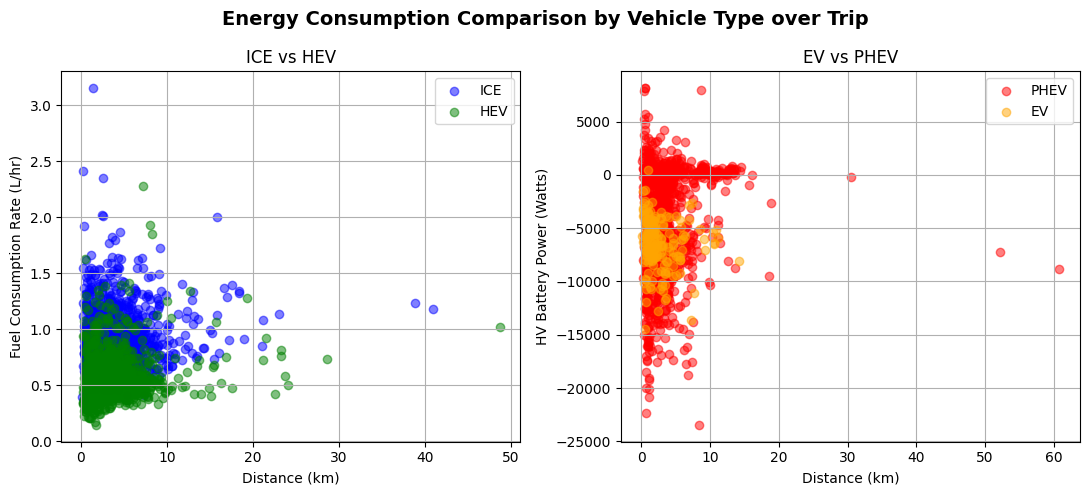

In [445]:
import matplotlib.pyplot as plt

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=False)

# ---------- Subplot 1: ICE vs HEV ----------
ax1 = axes[0]
ax1.scatter(
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']['Distance[km]'],
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']['FCR'],
    alpha=0.5,
    c='blue',
    label='ICE'
)
ax1.scatter(
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']['Distance[km]'],
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']['FCR'],
    alpha=0.5,
    c='green',
    label='HEV'
)
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Fuel Consumption Rate (L/hr)')
ax1.set_title('ICE vs HEV')
ax1.legend()
ax1.grid(True)

# ---------- Subplot 2: EV vs PHEV ----------
ax2 = axes[1]
ax2.scatter(
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']['Distance[km]'],
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='red',
    label='PHEV'
)
ax2.scatter(
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']['Distance[km]'],
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='orange',
    label='EV'
)
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('HV Battery Power (Watts)')
ax2.set_title('EV vs PHEV')
ax2.legend()
ax2.grid(True)

# ---------- Shared Title ----------
fig.suptitle('Energy Consumption Comparison by Vehicle Type over Trip', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for suptitle
plt.show()


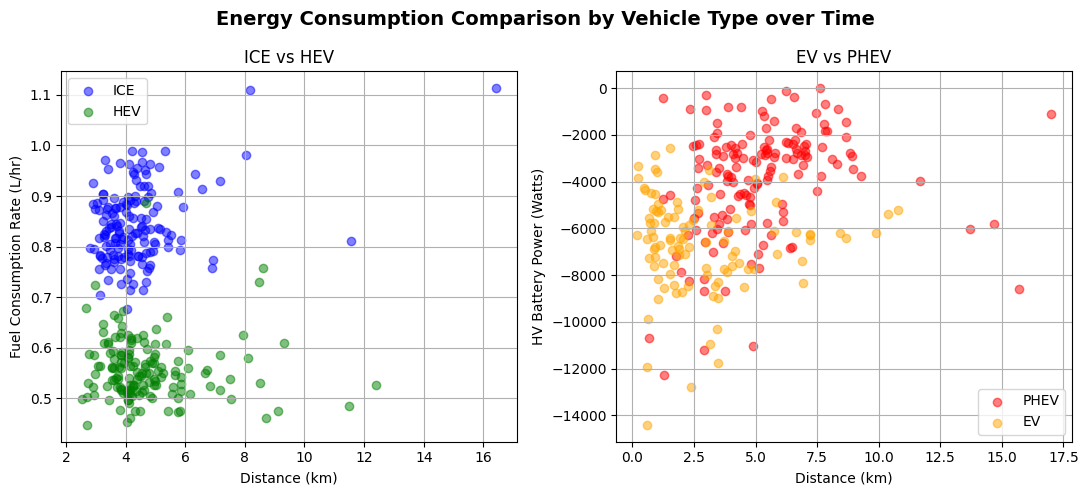

In [446]:
import matplotlib.pyplot as plt

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=False)

# ---------- Subplot 1: ICE vs HEV ----------
ax1 = axes[0]
ax1.scatter(
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']['Distance[km]'],
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']['FCR'],
    alpha=0.5,
    c='blue',
    label='ICE'
)
ax1.scatter(
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']['Distance[km]'],
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']['FCR'],
    alpha=0.5,
    c='green',
    label='HEV'
)
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Fuel Consumption Rate (L/hr)')
ax1.set_title('ICE vs HEV')
ax1.legend()
ax1.grid(True)

# ---------- Subplot 2: EV vs PHEV ----------
ax2 = axes[1]
ax2.scatter(
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']['Distance[km]'],
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='red',
    label='PHEV'
)
ax2.scatter(
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']['Distance[km]'],
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='orange',
    label='EV'
)
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('HV Battery Power (Watts)')
ax2.set_title('EV vs PHEV')
ax2.legend()
ax2.grid(True)

# ---------- Shared Title ----------
fig.suptitle('Energy Consumption Comparison by Vehicle Type over Time', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for suptitle
plt.show()


In [447]:
# Run for trip
df_ICE = df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']
df_HEV = df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']
df_EV = df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']
df_PHEV = df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']


In [487]:
# Run for time
df_ICE = df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']
df_HEV = df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']
df_EV = df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']
df_PHEV = df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']

In [490]:
# show the columns with missing values in df_ICE and df_HEV

missing_values = df_ICE.isnull().sum()
print("\nMissing values in ICE Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_HEV.isnull().sum()
print("\nMissing values in HEV Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_EV.isnull().sum()
print("\nMissing values in EV Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_PHEV.isnull().sum()
print("\nMissing values in PHEV Vehicles:")
print(missing_values[missing_values > 0])



Missing values in ICE Vehicles:
Heater Power[Watts]    154
dtype: int64

Missing values in HEV Vehicles:
Series([], dtype: int64)

Missing values in EV Vehicles:
Series([], dtype: int64)

Missing values in PHEV Vehicles:
Series([], dtype: int64)


In [449]:
df_ICE.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,2200.000000,2200.000000,2200.000000,0.0,0.0,2200.000000,2200.000000,2200.000000,1175.000000,2095.000000,2047.000000,0.0,2033.000000,2097.000000,2156.000000,1510.000000,2149.000000,1493.000000
mean,1194.488636,42.270459,-83.729158,NaN,NaN,38.513763,3.544566,1415.909895,1.676151,3472.837328,0.868315,NaN,12.367785,31.397375,0.368556,-0.252839,1.463076,1.240369
std,689.257253,0.012903,0.021687,NaN,NaN,10.335123,2.679785,194.666395,6.077748,480.131643,0.222176,NaN,3.401966,4.454647,1.621927,3.676007,3.343251,3.720074
min,5.000000,42.228171,-83.800113,NaN,NaN,0.986688,0.059206,650.157400,-30.611236,2500.000000,0.365122,NaN,5.273529,17.912852,-5.815972,-77.315070,-13.831522,-10.548753
25%,616.750000,42.262612,-83.740633,NaN,NaN,32.668991,2.136476,1307.395549,-2.000000,3168.519599,0.727863,NaN,10.324110,28.696029,-0.501707,-1.100772,-0.376688,-1.168705
50%,1167.500000,42.270864,-83.728508,NaN,NaN,37.639794,3.036812,1394.249014,1.497778,3500.000000,0.834765,NaN,11.743765,30.957374,0.108277,-0.333328,1.352447,0.975177
75%,1731.250000,42.278191,-83.716456,NaN,NaN,43.273612,4.259150,1495.901316,5.255294,3714.145658,0.961126,NaN,13.574757,33.667582,0.986104,0.403827,3.248159,3.426966
max,2928.000000,42.316908,-83.679590,NaN,NaN,92.988889,40.980174,2793.723608,28.986928,5500.000000,3.154674,NaN,43.106750,55.477125,13.543159,25.615986,26.718750,20.027608


In [450]:
df_HEV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,1586.000000,1586.000000,1586.000000,0.0,0.0,1586.000000,1586.000000,1586.000000,987.000000,1586.000000,1535.000000,0.0,1580.000000,1580.000000,1550.000000,218.000000,1541.000000,194.000000
mean,1090.000000,42.271435,-83.734765,NaN,NaN,43.516727,3.634765,1084.958824,1.869060,3241.805101,0.568199,NaN,8.346108,27.441848,-0.665138,0.014865,-0.270709,-1.529164
std,609.153997,0.014667,0.026042,NaN,NaN,9.671531,2.893226,229.100779,4.949470,369.860546,0.180528,NaN,2.579728,7.993945,1.191142,1.586888,2.048271,2.079918
min,8.000000,42.229036,-83.799807,NaN,NaN,10.932011,0.219721,130.172414,-13.918182,2000.000000,0.146293,NaN,2.197069,3.995943,-7.801827,-8.290480,-8.780185,-7.181490
25%,620.250000,42.262241,-83.750433,NaN,NaN,38.085168,1.937783,932.077829,-1.320829,3000.000000,0.464805,NaN,6.881587,23.848746,-1.181007,-0.589859,-1.615162,-2.996934
50%,1023.500000,42.273207,-83.731305,NaN,NaN,42.976737,3.167409,1078.741121,1.928058,3151.434960,0.533781,NaN,7.857364,26.945488,-0.570376,-0.017066,-0.317004,-1.493183
75%,1442.500000,42.281704,-83.715739,NaN,NaN,48.347727,4.595484,1235.755318,5.199352,3480.243613,0.624716,NaN,9.188845,30.106458,-0.080356,0.549279,0.939150,-0.395683
max,3012.000000,42.313205,-83.679651,NaN,NaN,96.187342,48.698232,2311.650206,17.283828,5000.000000,2.281641,NaN,32.731645,147.530296,8.016304,4.535953,10.465228,4.164043


In [464]:
df_PHEV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.0,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.0,1072.000000,1072.0
mean,1068.349813,42.273535,-83.724487,23.886959,0.0,42.361808,3.771616,480.276407,1.194308,3778.348617,1.300838,-4714.758687,4.607863,14.257791,0.312255,0.0,-2.304565,0.0
std,595.376940,0.018781,0.024099,115.817200,0.0,11.850411,3.752166,460.683247,6.459601,382.654582,1.184929,5009.957336,3.296976,0.616130,0.013494,0.0,0.001693,0.0
min,2.000000,42.229924,-83.799773,0.000000,0.0,11.558719,0.037676,0.000000,-20.871176,3000.000000,0.000000,-23445.889629,0.170000,0.000000,0.000000,0.0,-2.343750,0.0
25%,591.750000,42.259781,-83.739367,0.000000,0.0,35.242796,1.734695,0.000000,-2.776627,3635.765692,1.115816,-8076.683138,1.736842,14.257791,0.312255,0.0,-2.304565,0.0
50%,1027.500000,42.277576,-83.721872,0.000000,0.0,41.526763,3.064417,465.831741,2.016203,4000.000000,1.300838,-4519.362083,4.607863,14.257791,0.312255,0.0,-2.304565,0.0
75%,1505.250000,42.285169,-83.708786,0.000000,0.0,47.297805,4.449652,791.785924,5.473130,4000.000000,1.300838,-145.980815,6.140789,14.257791,0.312255,0.0,-2.304565,0.0
max,2497.000000,42.318748,-83.677901,1854.489437,0.0,101.218062,60.774807,3360.000000,26.222477,4000.000000,8.519646,8125.363238,40.230000,28.515582,0.624510,0.0,-2.265380,0.0


In [489]:
# Handle missing values

df_ICE.fillna({
    'OAT[DegC]': 15,
    'Generalized_Weight': df_ICE['Generalized_Weight'].mean(),
    'FCR': df_ICE['FCR'].mean(),
    'HV Battery Power[Watts]': 0.0,  # ICE vehicles typically do not have HV Battery Power
    'Air Conditioning Power[Watts]' : 0,
    'Heater Power[Watts]': df_ICE['Heater Power[Watts]'].mean(),
    'MAF[g/sec]': df_ICE['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_ICE['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_ICE['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': df_ICE['Short Term Fuel Trim Bank 2[%]'].mean(),
    'Long Term Fuel Trim Bank 1[%]': df_ICE['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': df_ICE['Long Term Fuel Trim Bank 2[%]'].mean()
}, inplace=True)

df_HEV.fillna({
    'OAT[DegC]': 15,
    'FCR': df_HEV['FCR'].mean(),
    'HV Battery Power[Watts]': 0,
    'Air Conditioning Power[Watts]': 0,
    'Heater Power[Watts]': 0,
    'MAF[g/sec]': df_HEV['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_HEV['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_HEV['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': df_HEV['Short Term Fuel Trim Bank 2[%]'].mean(),
    'Long Term Fuel Trim Bank 1[%]': df_HEV['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': df_HEV['Long Term Fuel Trim Bank 2[%]'].mean()
}, inplace=True)

df_EV.fillna({
    'Engine RPM[RPM]': 0,  # EVs typically do not have engine RPM
    'FCR': 0,  # EVs typically do not have fuel consumption rate  
    'MAF[g/sec]': 0,
    'Absolute Load[%]': 0,
    'Short Term Fuel Trim Bank 1[%]': 0,
    'Short Term Fuel Trim Bank 2[%]': 0,
    'Long Term Fuel Trim Bank 1[%]': 0,
    'Long Term Fuel Trim Bank 2[%]': 0
}, inplace=True)

df_PHEV.fillna({
    'OAT[DegC]': 15,
    'FCR': df_PHEV['FCR'].mean(),
    'HV Battery Power[Watts]': 0.0,  # PHEVs typically do not have HV Battery Power
    'Air Conditioning Power[Watts]': 0,
    'Heater Power[Watts]': 0,
    'MAF[g/sec]': df_PHEV['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_PHEV['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_PHEV['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': 0,
    'Long Term Fuel Trim Bank 1[%]': df_PHEV['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': 0
}, inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_2096\1278719703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ICE.fillna({
C:\Users\DELL\AppData\Local\Temp\ipykernel_2096\1278719703.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HEV.fillna({
C:\Users\DELL\AppData\Local\Temp\ipykernel_2096\1278719703.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EV.fillna({
C:\Users\DELL\AppData\Local\Temp\ipykernel_2096\127871970

In [466]:
def linear_regression_analysis(features, target, X, y):
    """
    Perform linear regression using given features and target.
    Prints coefficients, equation, and evaluation metrics.
    Returns the trained model and test predictions.
    """
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import numpy as np

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Print the coefficients
    print("Coefficients:")
    for feature, coef in zip(features, model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Slope (m): {model.coef_}")
    print(f"Intercept (b): {model.intercept_:.4f}")
    equation = "FCR = " + " + ".join([f"{coef:.4f} * {feature}" for feature, coef in zip(features, model.coef_)]) + f" + {model.intercept_:.4f}"
    print(equation)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared score: {r2:.4f}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.4f}")
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error: {rmse:.4f}")
    return model, X_test, y_test, y_pred

# Example usage:
# features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight']
# target = 'FCR'
# X = df_ICE[features]
# y = df_ICE[target]
# model, X_test, y_test, y_pred = linear_regression_analysis(features, target, X, y)

Coefficients:
Vehicle Speed[km/h]: 0.0119
Distance[km]: 0.0099
Engine RPM[RPM]: -0.0000
Slope (m): [ 1.19458365e-02  9.92499352e-03 -3.92327965e-05]
Intercept (b): 0.3977
FCR = 0.0119 * Vehicle Speed[km/h] + 0.0099 * Distance[km] + -0.0000 * Engine RPM[RPM] + 0.3977
R-squared score: 0.4515
Mean Absolute Error: 0.0318
Mean Squared Error: 0.0015
Root Mean Squared Error: 0.0390


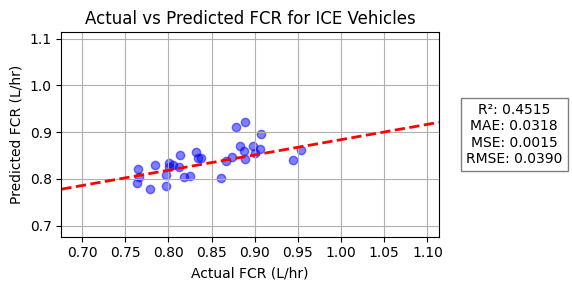

In [491]:
features = ['Vehicle Speed[km/h]','Distance[km]', 'Engine RPM[RPM]']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred = linear_regression_analysis(features, target, X, y)

# plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot([y.min(), y.max()], [model.predict(X_test).min(), model.predict(X_test).max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Coefficients:
Latitude[deg]: -1.4831
Longitude[deg]: -2.3314
Vehicle Speed[km/h]: 0.0074
Distance[km]: 0.0035
Engine RPM[RPM]: 0.0004
OAT[DegC]: 0.0009
Generalized_Weight: 0.0003
Slope (m): [-1.48306626e+00 -2.33140066e+00  7.42835641e-03  3.48140437e-03
  4.29092687e-04  9.22137986e-04  2.77332859e-04]
Intercept (b): -133.5514
FCR = -1.4831 * Latitude[deg] + -2.3314 * Longitude[deg] + 0.0074 * Vehicle Speed[km/h] + 0.0035 * Distance[km] + 0.0004 * Engine RPM[RPM] + 0.0009 * OAT[DegC] + 0.0003 * Generalized_Weight + -133.5514
R-squared score: 0.6486
Mean Absolute Error: 0.0233
Mean Squared Error: 0.0010
Root Mean Squared Error: 0.0313


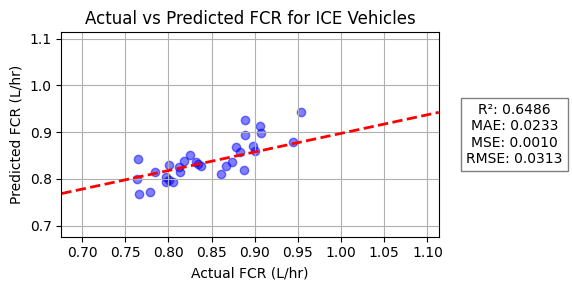

In [492]:
features = ['Latitude[deg]','Longitude[deg]','Vehicle Speed[km/h]','Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred = linear_regression_analysis(features, target, X, y)

# plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot([y.min(), y.max()], [model.predict(X_test).min(), model.predict(X_test).max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.tight_layout()
plt.show()

Coefficients:
Vehicle Speed[km/h]: 0.0067
Distance[km]: 0.0037
Engine RPM[RPM]: 0.0005
OAT[DegC]: 0.0011
Generalized_Weight: 0.0003
Slope (m): [0.00668397 0.00365921 0.00049977 0.0010579  0.00026238]
Intercept (b): -1.0552
FCR = 0.0067 * Vehicle Speed[km/h] + 0.0037 * Distance[km] + 0.0005 * Engine RPM[RPM] + 0.0011 * OAT[DegC] + 0.0003 * Generalized_Weight + -1.0552
R-squared score: 0.6922
Mean Absolute Error: 0.0232
Mean Squared Error: 0.0009
Root Mean Squared Error: 0.0292


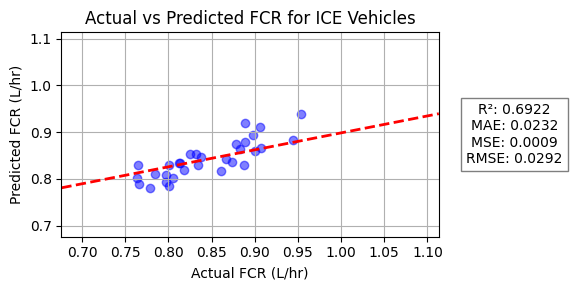

In [493]:
features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred = linear_regression_analysis(features, target, X, y)

# plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot([y.min(), y.max()], [model.predict(X_test).min(), model.predict(X_test).max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.tight_layout()
plt.show()

Coefficients:
Vehicle Speed[km/h]: 0.0008
Distance[km]: -0.0001
Engine RPM[RPM]: 0.0000
OAT[DegC]: 0.0001
Generalized_Weight: 0.0001
MAF[g/sec]: 0.0545
Absolute Load[%]: -0.0006
Short Term Fuel Trim Bank 1[%]: 0.0122
Short Term Fuel Trim Bank 2[%]: -0.0042
Long Term Fuel Trim Bank 1[%]: 0.0093
Long Term Fuel Trim Bank 2[%]: 0.0007
Slope (m): [ 8.21025696e-04 -9.01985764e-05  1.06617717e-05  8.36519613e-05
  5.96878267e-05  5.45067900e-02 -5.73463903e-04  1.22186713e-02
 -4.17321244e-03  9.27173407e-03  6.88926664e-04]
Intercept (b): -0.0641
FCR = 0.0008 * Vehicle Speed[km/h] + -0.0001 * Distance[km] + 0.0000 * Engine RPM[RPM] + 0.0001 * OAT[DegC] + 0.0001 * Generalized_Weight + 0.0545 * MAF[g/sec] + -0.0006 * Absolute Load[%] + 0.0122 * Short Term Fuel Trim Bank 1[%] + -0.0042 * Short Term Fuel Trim Bank 2[%] + 0.0093 * Long Term Fuel Trim Bank 1[%] + 0.0007 * Long Term Fuel Trim Bank 2[%] + -0.0641
R-squared score: 0.8635
Mean Absolute Error: 0.0156
Mean Squared Error: 0.0004
Root Mea

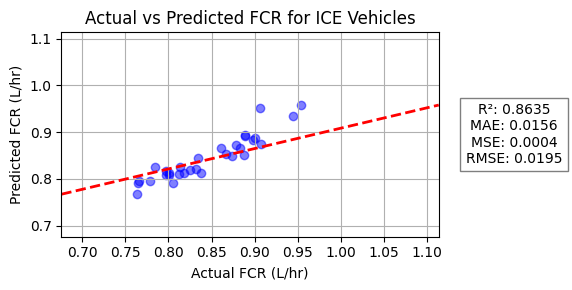

In [495]:
features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight','MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred = linear_regression_analysis(features, target, X, y)

# plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot([y.min(), y.max()], [model.predict(X_test).min(), model.predict(X_test).max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.tight_layout()
plt.show()

Coefficients:
Vehicle Speed[km/h]: 0.0006
Distance[km]: -0.0004
Engine RPM[RPM]: -0.0000
OAT[DegC]: 0.0001
Generalized_Weight: 0.0000
HV Battery Power[Watts]: 0.0000
MAF[g/sec]: 0.0642
Absolute Load[%]: 0.0008
Short Term Fuel Trim Bank 1[%]: 0.0042
Short Term Fuel Trim Bank 2[%]: 0.0001
Long Term Fuel Trim Bank 1[%]: 0.0021
Long Term Fuel Trim Bank 2[%]: -0.0007
Slope (m): [ 5.98583615e-04 -4.43350154e-04 -1.35557499e-05  1.08935467e-04
  1.20989532e-05  4.51028104e-17  6.42240794e-02  8.40500358e-04
  4.24817254e-03  7.75759806e-05  2.11864599e-03 -7.15950282e-04]
Intercept (b): -0.0392
FCR = 0.0006 * Vehicle Speed[km/h] + -0.0004 * Distance[km] + -0.0000 * Engine RPM[RPM] + 0.0001 * OAT[DegC] + 0.0000 * Generalized_Weight + 0.0000 * HV Battery Power[Watts] + 0.0642 * MAF[g/sec] + 0.0008 * Absolute Load[%] + 0.0042 * Short Term Fuel Trim Bank 1[%] + 0.0001 * Short Term Fuel Trim Bank 2[%] + 0.0021 * Long Term Fuel Trim Bank 1[%] + -0.0007 * Long Term Fuel Trim Bank 2[%] + -0.0392
R-sq

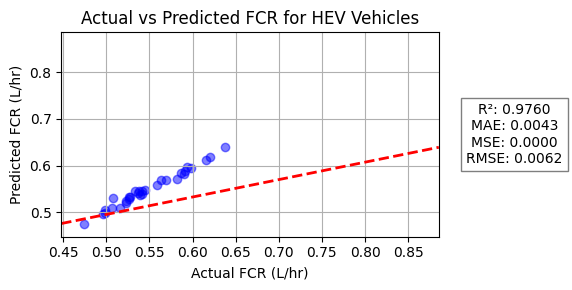

In [496]:
features = ['Vehicle Speed[km/h]',
             'Distance[km]',
               'Engine RPM[RPM]',
                 'OAT[DegC]',
                   'Generalized_Weight',
                   'HV Battery Power[Watts]',
                   'MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'
                   ]

target = 'FCR'
X = df_HEV[features]
y = df_HEV[target]
model, X_test, y_test, y_pred = linear_regression_analysis(features, target, X, y)

# plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot([y.min(), y.max()], [model.predict(X_test).min(), model.predict(X_test).max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted FCR for HEV Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.tight_layout()
plt.show()

Coefficients:
Latitude[deg]: -33776.0313
Longitude[deg]: 3699.4443
Air Conditioning Power[Watts]: -1.8578
Heater Power[Watts]: -1.5045
Vehicle Speed[km/h]: -135.9945
Distance[km]: 73.4439
OAT[DegC]: -15.2276
Generalized_Weight: 0.0000
Slope (m): [-3.37760313e+04  3.69944431e+03 -1.85780570e+00 -1.50451438e+00
 -1.35994532e+02  7.34438547e+01 -1.52276293e+01  0.00000000e+00]
Intercept (b): 1737674.6321
FCR = -33776.0313 * Latitude[deg] + 3699.4443 * Longitude[deg] + -1.8578 * Air Conditioning Power[Watts] + -1.5045 * Heater Power[Watts] + -135.9945 * Vehicle Speed[km/h] + 73.4439 * Distance[km] + -15.2276 * OAT[DegC] + 0.0000 * Generalized_Weight + 1737674.6321
R-squared score: 0.5422
Mean Absolute Error: 1145.0304
Mean Squared Error: 2464658.5797
Root Mean Squared Error: 1569.9231


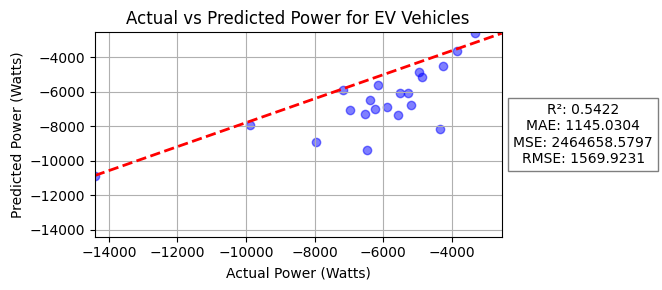

In [497]:
features = ['Latitude[deg]',
            'Longitude[deg]',
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]',
            'Generalized_Weight']
target = 'HV Battery Power[Watts]'
X = df_EV[features]
y = df_EV[target]
model, X_test, y_test, y_pred = linear_regression_analysis(features, target, X, y)

# plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot([y.min(), y.max()], [model.predict(X_test).min(), model.predict(X_test).max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Power for EV Vehicles')
plt.xlabel('Actual Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.tight_layout()
plt.show()

In [435]:
df_EV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts]
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0,192.000000,192.0,192.0,192.000000
mean,1312.286458,42.271497,-83.735299,457.753092,758.677578,37.601938,2.633718,0.0,1.682723,3500.0,0.0,-6523.042672
std,520.314309,0.016914,0.021729,387.748865,953.331492,11.567310,2.456442,0.0,6.019795,0.0,0.0,2324.714219
min,554.000000,42.231426,-83.796345,0.000000,0.000000,3.446784,0.132661,0.0,-14.455868,3500.0,0.0,-14409.176136
25%,822.750000,42.261343,-83.746096,75.323201,0.000000,30.326173,0.927085,0.0,-2.080354,3500.0,0.0,-7680.062309
50%,1177.000000,42.272274,-83.737289,389.670273,424.481066,36.819866,1.797607,0.0,2.000000,3500.0,0.0,-6503.715555
75%,1805.000000,42.284359,-83.724456,783.016172,1000.000000,44.896273,3.430748,0.0,5.145057,3500.0,0.0,-4900.811702
max,2200.000000,42.308496,-83.679000,1530.806452,3911.167513,67.251182,14.155463,0.0,15.165680,3500.0,0.0,482.351974


In [436]:
df_PHEV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts]
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.0,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,1068.349813,42.273535,-83.724487,23.886959,0.0,42.361808,3.771616,480.276407,1.194308,3778.348617,1.300838,-4714.758687
std,595.376940,0.018781,0.024099,115.817200,0.0,11.850411,3.752166,460.683247,6.459601,382.654582,1.184929,5009.957336
min,2.000000,42.229924,-83.799773,0.000000,0.0,11.558719,0.037676,0.000000,-20.871176,3000.000000,0.000000,-23445.889629
25%,591.750000,42.259781,-83.739367,0.000000,0.0,35.242796,1.734695,0.000000,-2.776627,3635.765692,1.115816,-8076.683138
50%,1027.500000,42.277576,-83.721872,0.000000,0.0,41.526763,3.064417,465.831741,2.016203,4000.000000,1.300838,-4519.362083
75%,1505.250000,42.285169,-83.708786,0.000000,0.0,47.297805,4.449652,791.785924,5.473130,4000.000000,1.300838,-145.980815
max,2497.000000,42.318748,-83.677901,1854.489437,0.0,101.218062,60.774807,3360.000000,26.222477,4000.000000,8.519646,8125.363238


Coefficients:
Latitude[deg]: 4181.7666
Longitude[deg]: -7432.2033
Engine RPM[RPM]: 8.7282
Air Conditioning Power[Watts]: -0.6312
Heater Power[Watts]: 0.0000
Vehicle Speed[km/h]: -163.3520
Distance[km]: 51.2449
OAT[DegC]: 130.4820
Generalized_Weight: -0.9121
Slope (m): [ 4.18176655e+03 -7.43220330e+03  8.72824430e+00 -6.31182261e-01
  6.18882723e-11 -1.63351968e+02  5.12449366e+01  1.30482048e+02
 -9.12114964e-01]
Intercept (b): -797775.9883
FCR = 4181.7666 * Latitude[deg] + -7432.2033 * Longitude[deg] + 8.7282 * Engine RPM[RPM] + -0.6312 * Air Conditioning Power[Watts] + 0.0000 * Heater Power[Watts] + -163.3520 * Vehicle Speed[km/h] + 51.2449 * Distance[km] + 130.4820 * OAT[DegC] + -0.9121 * Generalized_Weight + -797775.9883
R-squared score: 0.8408
Mean Absolute Error: 669.1716
Mean Squared Error: 808814.6406
Root Mean Squared Error: 899.3412


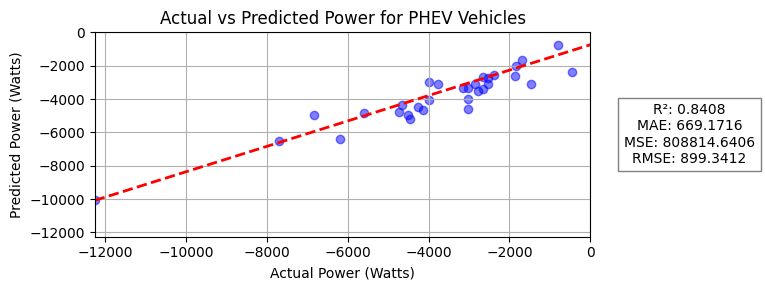

In [498]:
features = ['Latitude[deg]',
            'Longitude[deg]',
            'Engine RPM[RPM]',
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]',
            'Generalized_Weight',
            ]
target = 'HV Battery Power[Watts]'
X = df_PHEV[features]
y = df_PHEV[target]
model, X_test, y_test, y_pred = linear_regression_analysis(features, target, X, y)

# plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.figure(figsize=(8, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot([y.min(), y.max()], [model.predict(X_test).min(), model.predict(X_test).max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Power for PHEV Vehicles')
plt.xlabel('Actual Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.tight_layout()
plt.show()